<a href="https://colab.research.google.com/github/sunnie720/DL_study/blob/main/smoking_clf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# # 평가지표
# from sklearn.metrics import mean_squared_error, make_scorer, f1_score
# def rmse(y_true, y_pred):
#   return mean_squared_error(y_true, y_pred) ** 0.5

# rmse_scorer = make_scorer(rmse, greater_is_better=False)
# f1_scorer = make_scorer(f1_score, average='binary')

# # 모델
# model = GradientBoostingRegressor()

# # 매개변수
# params = {'n_estimators': [100,200,300],
#           'max_depth': [3,5,7,9],
#           'min_samples_leaf': [1,2,4,6,8],
#           'validation_fraction': [0.2],
#           'n_iter_no_change': [30]}

# # 그리드 서치 준비
# gridcv = GridSearchCV(model, param_grid=params, cv=4, scoring=rmse_scorer, verbose=10)

# # 그리드 서치 실행
# gridcv.fit(x_train, y_train)
# print(gridcv.best_params_)

# ##############

# # 모델 파라미터
# lgbm_params = {'n_estimators': [100, 200, 300],    # 100
#                'boosting_type': ['gbdt', 'goss'],    # 'gbdt'
#                'num_leaves': [10, 20, 31]     # 31
#                }

# # GridSearch 준비
# grid_lgbm = GridSearchCV(lgbm, param_grid=lgbm_params, cv=4)

# fit_params = {
#     "early_stopping_rounds": 30,
#     "eval_set": [(x_valid, y_valid)],
#     "eval_metric": 'rmse',
#     'verbose': 10
# }

# # GridSearch 실행
# grid_lgbm.fit(x_train, y_train, **fit_params)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('smoking_train.csv')
test = pd.read_csv('smoking_test.csv')
data.shape, test.shape

((44554, 26), (11138, 25))

In [ ]:
display(data.head(2))
display(test.head(2))

gender  age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  \
0      F   55         160          70       74.0             1.0   
1      M   45         155          60       78.0             1.2   

   eyesight(right)  hearing(left)  hearing(right)  systolic  ...  hemoglobin  \
0              1.0            1.0             1.0     125.0  ...        12.5   
1              1.2            1.0             1.0     136.0  ...        14.9   

   Urine protein  serum creatinine   AST   ALT   Gtp  oral  dental caries  \
0            1.0               1.0  29.0  13.0  14.0     Y              0   
1            1.0               1.1  32.0  21.0  36.0     Y              1   

   tartar  smoking  
0       N        0  
1       Y        1  

[2 rows x 26 columns]

gender  age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  \
0      M   35         180          95      100.0             1.0   
1      M   60         170          75       89.0             0.8   

   eyesight(right)  hearing(left)  hearing(right)  systolic  ...    LDL  \
0              1.0            1.0             1.0     138.0  ...  115.0   
1              0.4            1.0             1.0     147.0  ...  128.0   

   hemoglobin  Urine protein  serum creatinine   AST   ALT    Gtp  oral  \
0        16.3            1.0               1.1  24.0  28.0   34.0     Y   
1        14.4            1.0               1.0  32.0  17.0  120.0     Y   

   dental caries  tartar  
0              0       Y  
1              0       Y  

[2 rows x 25 columns]

In [ ]:
data.columns

Index(['gender', 'age', 'height(cm)', 'weight(kg)', 'waist(cm)',
       'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)',
       'systolic', 'relaxation', 'fasting blood sugar', 'Cholesterol',
       'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'Urine protein',
       'serum creatinine', 'AST', 'ALT', 'Gtp', 'oral', 'dental caries',
       'tartar', 'smoking'],
      dtype='object')

In [ ]:
# 수치형 변수, 범주형 변수를 타입에 따라서 분류
num_cols = [col for col in data if data[col].dtype in ['int64', 'float64']]
cat_cols = [col for col in data if data[col].dtype in ['O']]
print('num_cols: ', num_cols)
print('cat_cols: ', cat_cols)

num_cols:  ['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic', 'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST', 'ALT', 'Gtp', 'dental caries', 'smoking']
cat_cols:  ['gender', 'oral', 'tartar']


### EDA

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44554 entries, 0 to 44553
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               44554 non-null  object 
 1   age                  44554 non-null  int64  
 2   height(cm)           44554 non-null  int64  
 3   weight(kg)           44554 non-null  int64  
 4   waist(cm)            44554 non-null  float64
 5   eyesight(left)       44554 non-null  float64
 6   eyesight(right)      44554 non-null  float64
 7   hearing(left)        44554 non-null  float64
 8   hearing(right)       44554 non-null  float64
 9   systolic             44554 non-null  float64
 10  relaxation           44554 non-null  float64
 11  fasting blood sugar  44554 non-null  float64
 12  Cholesterol          44554 non-null  float64
 13  triglyceride         44554 non-null  float64
 14  HDL                  44554 non-null  float64
 15  LDL                  44554 non-null 

In [ ]:
data.isna().sum()

gender                 0
age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
oral                   0
dental caries          0
tartar                 0
smoking                0
dtype: int64

In [ ]:
# 범주형 데이터 구성 확인
for col in cat_cols:
    print(col)
    print(data[col].value_counts())
    print()

gender
M    28359
F    16195
Name: gender, dtype: int64

oral
Y    44554
Name: oral, dtype: int64

tartar
Y    24702
N    19852
Name: tartar, dtype: int64



In [ ]:
# 연속형 변수 기초통계량 확인
data[num_cols].describe().T

count        mean        std    min    25%    50%  \
age                  44554.0   44.169547  12.085679   20.0   40.0   40.0   
height(cm)           44554.0  164.656260   9.200969  130.0  160.0  165.0   
weight(kg)           44554.0   65.869619  12.791815   30.0   55.0   65.0   
waist(cm)            44554.0   82.063655   9.266407   51.0   76.0   82.0   
eyesight(left)       44554.0    1.014468   0.496635    0.1    0.8    1.0   
eyesight(right)      44554.0    1.009070   0.492310    0.1    0.8    1.0   
hearing(left)        44554.0    1.025362   0.157225    1.0    1.0    1.0   
hearing(right)       44554.0    1.025968   0.159043    1.0    1.0    1.0   
systolic             44554.0  121.524756  13.693588   71.0  112.0  120.0   
relaxation           44554.0   76.030233   9.694251   40.0   70.0   76.0   
fasting blood sugar  44554.0   99.253715  20.583037   46.0   89.0   96.0   
Cholesterol          44554.0  196.965951  36.278172   55.0  172.0  195.0   
triglyceride         44554.0  126.606814  71.550409   11.0   74.0  108.0   
HDL                  44554.0   57.336154  14.814916    4.0   47.0   55.0   
LDL                  44554.0  115.047762  41.596317    1.0   92.0  113.0   
hemoglobin           44554.0   14.627290   1.562740    4.9   13.6   14.8   
Urine protein        44554.0    1.088926   0.411047    1.0    1.0    1.0   
serum creatinine     44554.0    0.885777   0.221421    0.1    0.8    0.9   
AST                  44554.0   26.180163  19.997327    6.0   19.0   23.0   
ALT                  44554.0   27.043004  32.270771    1.0   15.0   21.0   
Gtp                  44554.0   40.030188  50.230177    1.0   17.0   26.0   
dental caries        44554.0    0.215200   0.410965    0.0    0.0    0.0   
smoking              44554.0    0.366544   0.481866    0.0    0.0    0.0   

                       75%     max  
age                   55.0    85.0  
height(cm)           170.0   190.0  
weight(kg)            75.0   135.0  
waist(cm)             88.0   129.0  
eyesight(left)         1.2     9.9  
eyesight(right)        1.2     9.9  
hearing(left)          1.0     2.0  
hearing(right)         1.0     2.0  
systolic             130.0   240.0  
relaxation            82.0   146.0  
fasting blood sugar  104.0   475.0  
Cholesterol          220.0   445.0  
triglyceride         160.0   999.0  
HDL                   66.0   618.0  
LDL                  136.0  1860.0  
hemoglobin            15.8    21.1  
Urine protein          1.0     6.0  
serum creatinine       1.0    11.6  
AST                   28.0  1311.0  
ALT                   31.0  2914.0  
Gtp                   44.0   999.0  
dental caries          0.0     1.0  
smoking                1.0     1.0

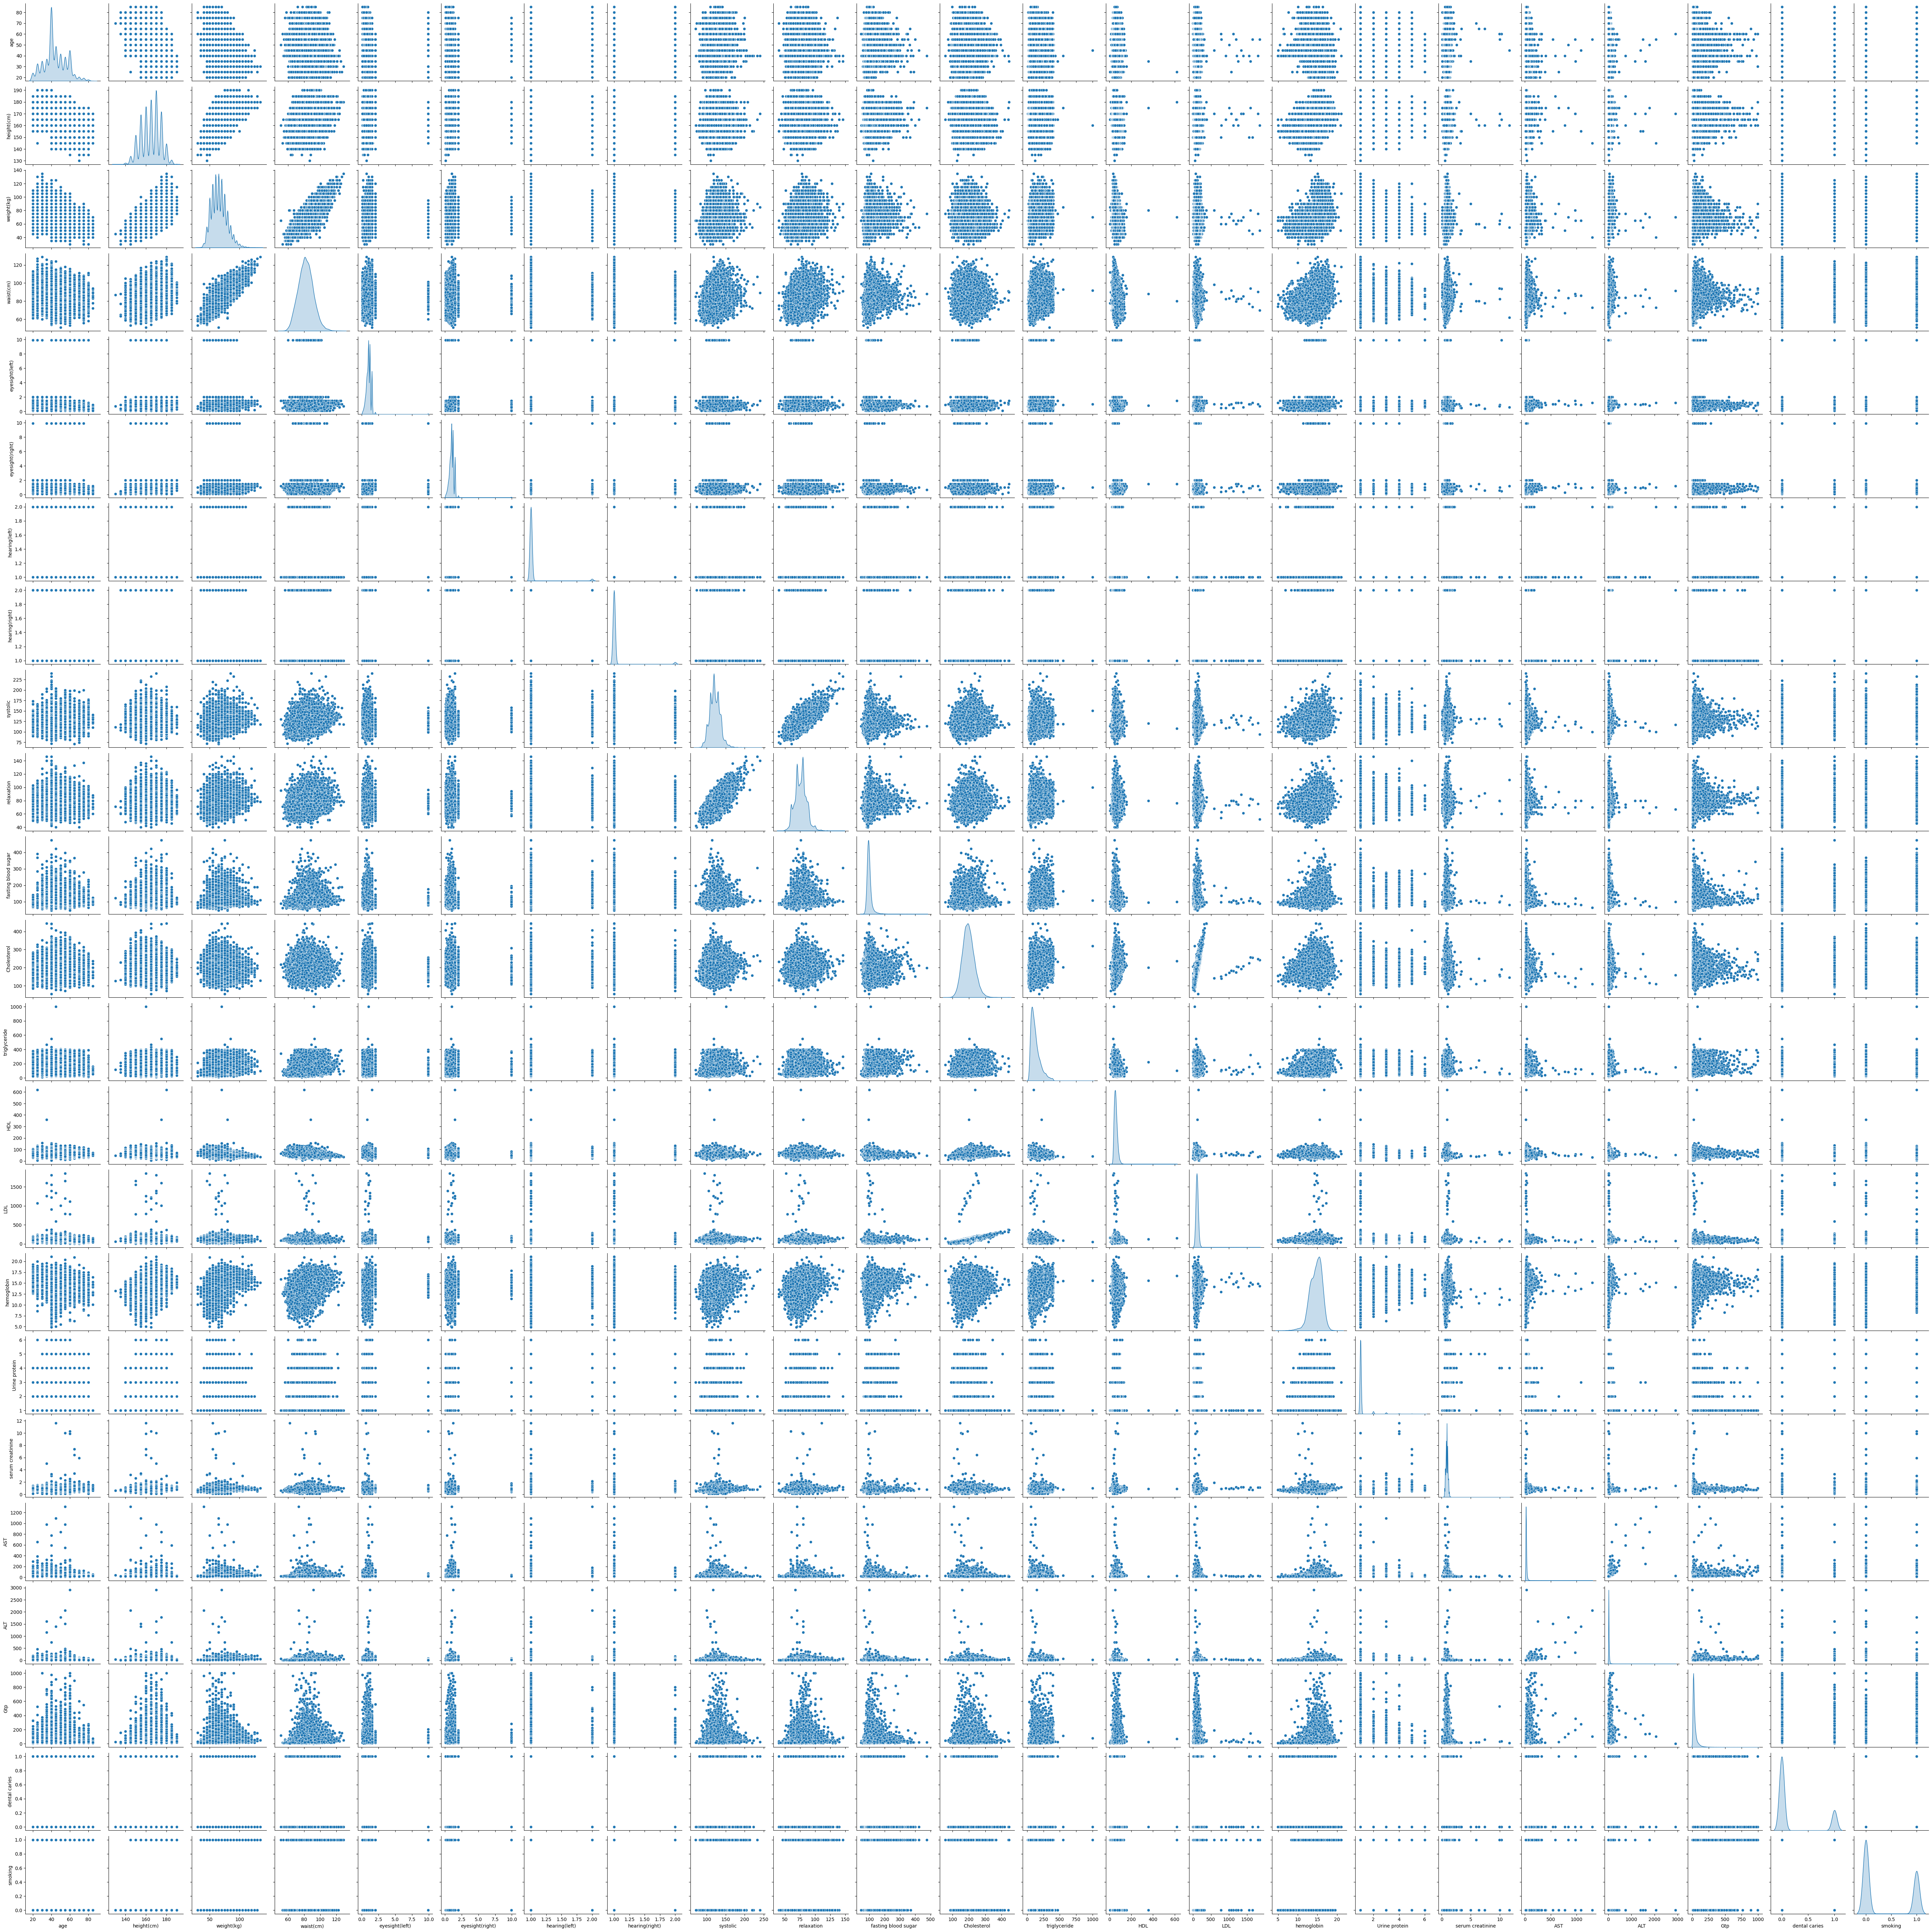

In [ ]:
# 연속형 변수 개형 확인
sns.pairplot(data, diag_kind='kde')
plt.show()

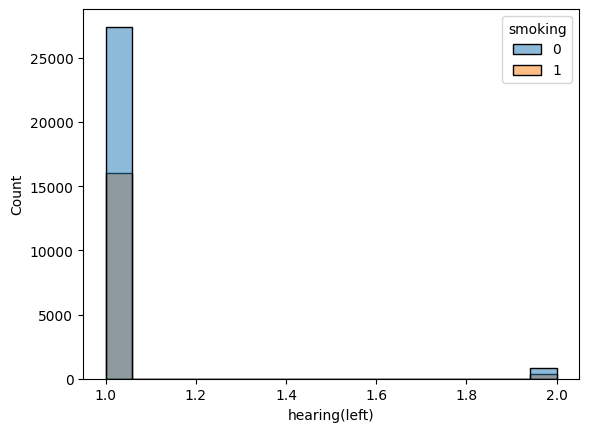

In [ ]:
sns.histplot(data=data, x='hearing(left)', hue='smoking')
plt.show()

In [ ]:
display(data.query('triglyceride>=999'))
print('triglyceride에서 999 제외 최대값:', data.query('triglyceride<999').triglyceride.max())

gender  age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  \
24437      M   45         160          70       92.0             1.0   

       eyesight(right)  hearing(left)  hearing(right)  systolic  ...  \
24437              1.0            1.0             1.0     151.0  ...   

       hemoglobin  Urine protein  serum creatinine   AST   ALT   Gtp  oral  \
24437        15.6            1.0               1.0  21.0  20.0  77.0     Y   

       dental caries  tartar  smoking  
24437              0       Y        1  

[1 rows x 26 columns]

triglyceride에서 999 제외 최대값: 548.0


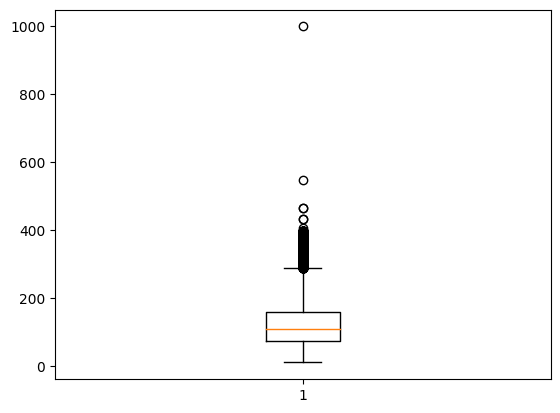

In [ ]:
plt.boxplot(data.triglyceride)
plt.show()

In [ ]:
# 1.5IQR 이상인 데이터 확인
outlier = data.query('triglyceride>1.5*(triglyceride.quantile(0.75)-triglyceride.quantile(0.25))')
outlier

gender  age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  \
1          M   45         155          60       78.0             1.2   
2          M   45         165          75       93.0             0.6   
8          M   25         175          80       78.0             1.2   
10         M   35         170         100      105.0             1.2   
14         F   45         150          60       83.0             1.2   
...      ...  ...         ...         ...        ...             ...   
44538      M   40         175          80       93.1             1.2   
44539      M   35         170          65       84.8             1.0   
44540      M   20         170          75       82.9             1.5   
44543      M   45         175          65       85.5             0.7   
44551      F   60         160          50       74.0             0.4   

       eyesight(right)  hearing(left)  hearing(right)  systolic  ...  \
1                  1.2            1.0             1.0     136.0  ...   
2                  0.3            1.0             1.0     135.0  ...   
8                  1.2            1.0             1.0     130.0  ...   
10                 1.2            1.0             1.0     138.0  ...   
14                 0.9            1.0             1.0     128.0  ...   
...                ...            ...             ...       ...  ...   
44538              1.2            1.0             1.0     134.0  ...   
44539              1.0            1.0             1.0     128.0  ...   
44540              1.5            1.0             1.0     124.0  ...   
44543              0.7            1.0             1.0     140.0  ...   
44551              0.5            1.0             1.0     125.0  ...   

       hemoglobin  Urine protein  serum creatinine   AST   ALT   Gtp  oral  \
1            14.9            1.0               1.1  32.0  21.0  36.0     Y   
2            16.0            1.0               1.1  29.0  46.0  49.0     Y   
8            16.4            1.0               1.0  19.0  22.0  33.0     Y   
10           15.2            1.0               1.3  35.0  56.0  63.0     Y   
14           14.5            1.0               0.8  24.0  26.0  22.0     Y   
...           ...            ...               ...   ...   ...   ...   ...   
44538        16.0            1.0               0.9  20.0  16.0  53.0     Y   
44539        18.0            1.0               1.0  66.0  86.0  84.0     Y   
44540        15.2            1.0               1.0  27.0  21.0  24.0     Y   
44543        14.6            1.0               0.8  32.0  28.0  80.0     Y   
44551        12.8            2.0               0.4  18.0  19.0  40.0     Y   

       dental caries  tartar  smoking  
1                  1       Y        1  
2                  1       Y        1  
8                  0       N        1  
10                 0       N        0  
14                 0       N        0  
...              ...     ...      ...  
44538              0       N        1  
44539              1       N        1  
44540              0       N        1  
44543              0       N        0  
44551              0       N        0  

[16698 rows x 26 columns]

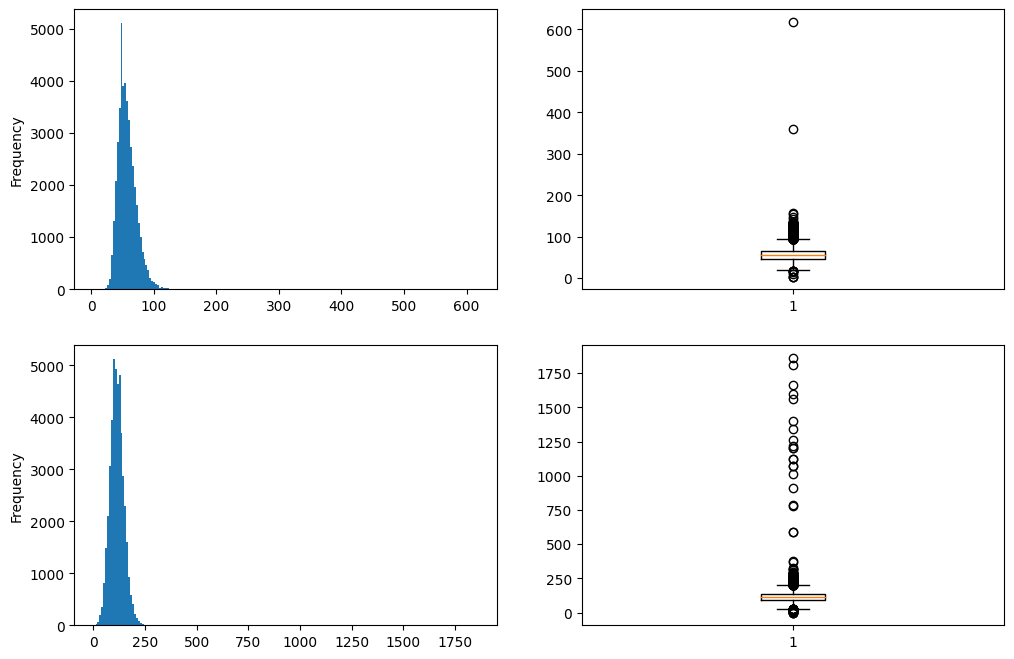

In [ ]:
# HDL, LDL 이상치 확인
plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
data.HDL.plot(kind='hist', bins=200)
plt.subplot(2,2,2)
plt.boxplot(data.HDL)

plt.subplot(2,2,3)
data.LDL.plot(kind='hist', bins=200)
plt.subplot(2,2,4)
plt.boxplot(data.LDL)

plt.show()

In [ ]:
data.query('HDL>200 or LDL>500')

gender  age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  \
2264       M   35         175          80       88.0             0.8   
2988       F   55         150          45       73.7             1.2   
5243       M   35         175          80       94.1             1.0   
9305       F   60         150          60       89.8             0.5   
9631       M   40         165          60       81.8             1.2   
13589      M   55         165          60       79.8             1.2   
18169      M   25         170          75       91.7             1.0   
18599      M   60         160          65       85.4             0.5   
19870      M   45         170          80       98.1             1.0   
20450      M   55         160          50       69.8             0.7   
22211      M   45         170          65       82.8             1.2   
30731      M   55         165          60       79.8             1.2   
33609      M   40         170          70       85.4             0.6   
35427      M   45         170          80       98.1             1.0   
36118      M   40         170          75       90.5             1.0   
36947      M   25         180          70       80.0             1.5   
37238      F   40         150          50       77.2             1.0   
38373      M   50         175          70       83.1             0.9   
38918      M   40         165          60       82.4             0.5   
39158      M   55         160          70       90.3             1.0   
42201      M   60         160          65       85.4             0.5   
43094      M   25         170          75       91.7             1.0   
43417      M   35         160          65       82.7             1.2   

       eyesight(right)  hearing(left)  hearing(right)  systolic  ...  \
2264               1.5            1.0             1.0     120.0  ...   
2988               1.2            1.0             1.0     118.0  ...   
5243               0.9            1.0             1.0     134.0  ...   
9305               0.4            1.0             1.0     128.0  ...   
9631               1.2            1.0             1.0     122.0  ...   
13589              1.5            1.0             1.0     129.0  ...   
18169              1.0            1.0             1.0     134.0  ...   
18599              0.5            1.0             1.0     140.0  ...   
19870              1.0            1.0             1.0     117.0  ...   
20450              0.7            1.0             1.0      94.0  ...   
22211              1.2            1.0             1.0     138.0  ...   
30731              1.5            1.0             1.0     129.0  ...   
33609              0.4            1.0             1.0     105.0  ...   
35427              1.0            1.0             1.0     117.0  ...   
36118              1.2            1.0             1.0     121.0  ...   
36947              1.5            1.0             1.0     108.0  ...   
37238              0.9            1.0             1.0     128.0  ...   
38373              0.9            1.0             1.0     110.0  ...   
38918              0.5            1.0             1.0     109.0  ...   
39158              1.0            1.0             1.0     123.0  ...   
42201              0.5            1.0             1.0     140.0  ...   
43094              1.0            1.0             1.0     134.0  ...   
43417              1.5            1.0             1.0     118.0  ...   

       hemoglobin  Urine protein  serum creatinine   AST   ALT    Gtp  oral  \
2264         15.6            1.0               0.9  18.0  19.0   24.0     Y   
2988         14.7            1.0               0.7  22.0  13.0   13.0     Y   
5243         15.1            1.0               1.1  38.0  65.0  147.0     Y   
9305         13.0            1.0               0.9  32.0  41.0   22.0     Y   
9631         15.4            1.0               1.1  20.0  22.0   38.0     Y   
13589        15.2            1.0               1.2  17.0  25.0   31.0     

In [ ]:
data['dental caries'].value_counts()

0    34966
1     9588
Name: dental caries, dtype: int64

In [ ]:
data.smoking.value_counts()

0    28223
1    16331
Name: smoking, dtype: int64

### -- 전처리 안한 Baseline

In [ ]:
data.head(1)

gender  age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  \
0      F   55         160          70       74.0             1.0   

   eyesight(right)  hearing(left)  hearing(right)  systolic  ...  hemoglobin  \
0              1.0            1.0             1.0     125.0  ...        12.5   

   Urine protein  serum creatinine   AST   ALT   Gtp  oral  dental caries  \
0            1.0               1.0  29.0  13.0  14.0     Y              0   

   tartar  smoking  
0       N        0  

[1 rows x 26 columns]

In [ ]:
data.shape

(44554, 26)

In [ ]:
x_data = data.iloc[:,:-1]
y_data = data.iloc[:,-1]

In [ ]:
# train, test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.2, random_state=222)
x_train.shape, x_test.shape

((35643, 25), (8911, 25))

In [ ]:
# 더미변수 생성
x_train = pd.get_dummies(x_train)
x_test = pd.get_dummies(x_test)

display(x_train.head(1))
display(x_test.head(1))

age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  eyesight(right)  \
837   70         155          50       74.5             0.6              0.5   

     hearing(left)  hearing(right)  systolic  relaxation  ...  \
837            2.0             1.0     133.0        73.0  ...   

     serum creatinine   AST   ALT   Gtp  dental caries  gender_F  gender_M  \
837               0.8  38.0  27.0  37.0              0         0         1   

     oral_Y  tartar_N  tartar_Y  
837       1         0         1  

[1 rows x 27 columns]

age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  \
38757   55         175          70       86.0             0.9   

       eyesight(right)  hearing(left)  hearing(right)  systolic  relaxation  \
38757              1.0            1.0             1.0     109.0        68.0   

       ...  serum creatinine   AST   ALT   Gtp  dental caries  gender_F  \
38757  ...               1.0  23.0  17.0  22.0              0         0   

       gender_M  oral_Y  tartar_N  tartar_Y  
38757         1       1         0         1  

[1 rows x 27 columns]

In [ ]:
# scaling
from sklearn.preprocessing import StandardScaler
scaler_ss = StandardScaler()
x_train.iloc[:,:-5] = scaler_ss.fit_transform(x_train.iloc[:,:-5])
x_test.iloc[:,:-5] = scaler_ss.transform(x_test.iloc[:,:-5])

display(x_train.head(1))
display(x_test.head(1))

age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  \
837  2.136791   -1.046584   -1.241248   -0.81713       -0.830898   

     eyesight(right)  hearing(left)  hearing(right)  systolic  relaxation  \
837        -1.031599       6.178036        -0.16521  0.838379    -0.31206   

     ...  serum creatinine       AST       ALT       Gtp  dental caries  \
837  ...         -0.391253  0.571302 -0.003914 -0.060533      -0.522764   

     gender_F  gender_M  oral_Y  tartar_N  tartar_Y  
837         0         1       1         0         1  

[1 rows x 27 columns]

age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  \
38757  0.893038    1.125185    0.323656   0.423868       -0.228994   

       eyesight(right)  hearing(left)  hearing(right)  systolic  relaxation  \
38757        -0.018023      -0.161864        -0.16521 -0.916155   -0.827909   

       ...  serum creatinine       AST       ALT       Gtp  dental caries  \
38757  ...          0.527298 -0.154889 -0.294334 -0.361003      -0.522764   

       gender_F  gender_M  oral_Y  tartar_N  tartar_Y  
38757         0         1       1         0         1  

[1 rows x 27 columns]

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [ ]:
model_lr = LogisticRegression()
model_svm = SVC()
model_dt = DecisionTreeClassifier()
model_rf = RandomForestClassifier()
model_gb = GradientBoostingClassifier()
model_xgb = XGBClassifier()
model_lgbm = LGBMClassifier()

In [ ]:
from sklearn.metrics import classification_report, f1_score

In [ ]:
# 모델 성능 비교
models = [model_lr, model_svm, model_dt, model_rf, model_gb, model_xgb, model_lgbm]
model_names = ['LogisticRegression', 'SVC', 'DecisionTreeClassifier', 'RandomForestClassifier', 'GradientBoostingClassifier', 'XGBClassifier', 'LGBMClassifier']

for model, name in zip(models, model_names):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(f'{name} f1 score: {f1_score(y_test, y_pred)}')

LogisticRegression f1 score: 0.6631732168850072
SVC f1 score: 0.6903832248734635
DecisionTreeClassifier f1 score: 0.6777811458017582
RandomForestClassifier f1 score: 0.756877990430622
GradientBoostingClassifier f1 score: 0.6859818554287387
[22:35:17] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_52i0zqsusg/croot/xgboost-split_1675119655573/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier f1 score: 0.6995073891625615
LGBMClassifier f1 score: 0.6916358253145818


-- 테스트셋 추론

In [ ]:
test.head(2)

gender  age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  \
0      M   35         180          95      100.0             1.0   
1      M   60         170          75       89.0             0.8   

   eyesight(right)  hearing(left)  hearing(right)  systolic  ...    LDL  \
0              1.0            1.0             1.0     138.0  ...  115.0   
1              0.4            1.0             1.0     147.0  ...  128.0   

   hemoglobin  Urine protein  serum creatinine   AST   ALT    Gtp  oral  \
0        16.3            1.0               1.1  24.0  28.0   34.0     Y   
1        14.4            1.0               1.0  32.0  17.0  120.0     Y   

   dental caries  tartar  
0              0       Y  
1              0       Y  

[2 rows x 25 columns]

In [ ]:
test_prep = test.copy()
test_prep = pd.get_dummies(test_prep)
test_prep.iloc[:,:-5] = scaler_ss.transform(test_prep.iloc[:,:-5])
test_prep.head(2)

age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  \
0 -0.758807    1.667230    2.278383   1.933636       -0.031137   
1  1.311893    0.582142    0.715599   0.748320       -0.427141   

   eyesight(right)  hearing(left)  hearing(right)  systolic  relaxation  ...  \
0        -0.019899      -0.158777       -0.162091  1.201284    0.615122  ...   
1        -1.231346      -0.158777       -0.162091  1.856409    2.465735  ...   

   serum creatinine       AST       ALT       Gtp  dental caries  gender_F  \
0          0.955431 -0.107458  0.030313 -0.119995      -0.524509         0   
1          0.508467  0.299076 -0.298770  1.630128      -0.524509         0   

   gender_M  oral_Y  tartar_N  tartar_Y  
0         1       1         0         1  
1         1       1         0         1  

[2 rows x 27 columns]

In [ ]:
pd.concat([x_train, x_test]).shape, pd.concat([y_train, y_test]).shape

((44554, 27), (44554,))

In [ ]:
# 전체 train 데이터로 학습
model_base = RandomForestClassifier()
model_base.fit(pd.concat([x_train, x_test]), pd.concat([y_train, y_test]))

# test 데이터 예측
testset_y_pread = model_base.predict(test_prep)
submission_base = pd.DataFrame({'smoking': testset_y_pread})
submission_base

smoking
0            0
1            0
2            0
3            1
4            1
...        ...
11133        0
11134        0
11135        1
11136        1
11137        0

[11138 rows x 1 columns]

In [ ]:
submission_base.to_csv('submission_base_smoking.csv', index=False)

### -- 전처리 데이터 & 튜닝 전
- oral 열 삭제 - 전체가 Y
- hearing 열 삭제 - 일부 2 외에 전체 1
- triglyceride 최대값 999는 이상치
- HDL 200 초과, LDL 500 초과는 이상치

In [ ]:
# 전처리
data_prep = data.query('triglyceride < 999').copy()
data_prep = data_prep.query('HDL < 200 & LDL < 500')

test_prep = test.copy()

In [ ]:
x_data = data_prep.iloc[:,:-1]
y_data = data_prep.iloc[:,-1]

In [ ]:
x_data.shape, y_data.shape, test_prep.shape

((44530, 25), (44530,), (11138, 25))

In [ ]:
# train, test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.2, random_state=222)
x_train.shape, x_test.shape

((35624, 25), (8906, 25))

In [ ]:
# 더미변수 생성
x_train = pd.get_dummies(x_train)
x_test = pd.get_dummies(x_test)

display(x_train.head(1))
display(x_test.head(1))

age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  eyesight(right)  \
2483   30         170          75       81.0             0.9              1.0   

      hearing(left)  hearing(right)  systolic  relaxation  ...  \
2483            1.0             1.0     100.0        60.0  ...   

      serum creatinine   AST   ALT   Gtp  dental caries  gender_F  gender_M  \
2483               1.1  30.0  25.0  35.0              0         0         1   

      oral_Y  tartar_N  tartar_Y  
2483       1         0         1  

[1 rows x 27 columns]

age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  \
13295   60         150          50       80.4             1.0   

       eyesight(right)  hearing(left)  hearing(right)  systolic  relaxation  \
13295              1.0            1.0             2.0      95.0        65.0   

       ...  serum creatinine   AST   ALT   Gtp  dental caries  gender_F  \
13295  ...               0.8  22.0  14.0  19.0              0         1   

       gender_M  oral_Y  tartar_N  tartar_Y  
13295         0       1         1         0  

[1 rows x 27 columns]

##### --- StandardScaler

In [ ]:
# scaling
from sklearn.preprocessing import StandardScaler
scaler_ss = StandardScaler()
x_train.iloc[:,:-5] = scaler_ss.fit_transform(x_train.iloc[:,:-5])
x_test.iloc[:,:-5] = scaler_ss.transform(x_test.iloc[:,:-5])

display(x_train.head(1))
display(x_test.head(1))

age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  \
2483 -1.172948    0.582142    0.715599  -0.113727       -0.229139   

      eyesight(right)  hearing(left)  hearing(right)  systolic  relaxation  \
2483        -0.019899      -0.158777       -0.162091 -1.564801   -1.646738   

      ...  serum creatinine       AST       ALT       Gtp  dental caries  \
2483  ...          0.955431  0.197443 -0.059437 -0.099645      -0.524509   

      gender_F  gender_M  oral_Y  tartar_N  tartar_Y  
2483         0         1       1         0         1  

[1 rows x 27 columns]

age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  \
13295  1.311893   -1.588035    -1.23788  -0.178381       -0.031137   

       eyesight(right)  hearing(left)  hearing(right)  systolic  relaxation  \
13295        -0.019899      -0.158777        6.169392  -1.92876   -1.132679   

       ...  serum creatinine       AST       ALT       Gtp  dental caries  \
13295  ...          -0.38546 -0.209091 -0.388519 -0.425249      -0.524509   

       gender_F  gender_M  oral_Y  tartar_N  tartar_Y  
13295         1         0       1         1         0  

[1 rows x 27 columns]

In [ ]:
model_lr = LogisticRegression()
model_svm = SVC()
model_dt = DecisionTreeClassifier()
model_rf = RandomForestClassifier()
model_gb = GradientBoostingClassifier()
model_xgb = XGBClassifier()
model_lgbm = LGBMClassifier()

In [ ]:
# 모델 성능 비교
models = [model_lr, model_dt, model_rf, model_gb, model_xgb, model_lgbm]
model_names = ['LogisticRegression', 'DecisionTreeClassifier', 'RandomForestClassifier', 'GradientBoostingClassifier', 'XGBClassifier', 'LGBMClassifier']

for model, name in zip(models, model_names):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(f'{name} f1 score: {f1_score(y_test, y_pred)}')

LogisticRegression f1 score: 0.6570333235033913
DecisionTreeClassifier f1 score: 0.6800725733293015
RandomForestClassifier f1 score: 0.7499625018749063
GradientBoostingClassifier f1 score: 0.6790945406125165
[23:13:54] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_52i0zqsusg/croot/xgboost-split_1675119655573/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier f1 score: 0.6904725725573622
LGBMClassifier f1 score: 0.687025175033517


##### --- MinMaxScaler

In [ ]:
# 전처리
data_prep = data.query('triglyceride < 999').copy()
data_prep = data_prep.query('HDL < 200 & LDL < 500')

test_prep = test.copy()

In [ ]:
x_data = data_prep.iloc[:,:-1]
y_data = data_prep.iloc[:,-1]

In [ ]:
x_data.shape, y_data.shape, test_prep.shape

((44530, 25), (44530,), (11138, 25))

In [ ]:
# train, test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.2, random_state=222)
x_train.shape, x_test.shape

((35624, 25), (8906, 25))

In [ ]:
# 더미변수 생성
x_train = pd.get_dummies(x_train)
x_test = pd.get_dummies(x_test)

display(x_train.head(1))
display(x_test.head(1))

age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  eyesight(right)  \
2483   30         170          75       81.0             0.9              1.0   

      hearing(left)  hearing(right)  systolic  relaxation  ...  \
2483            1.0             1.0     100.0        60.0  ...   

      serum creatinine   AST   ALT   Gtp  dental caries  gender_F  gender_M  \
2483               1.1  30.0  25.0  35.0              0         0         1   

      oral_Y  tartar_N  tartar_Y  
2483       1         0         1  

[1 rows x 27 columns]

age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  \
13295   60         150          50       80.4             1.0   

       eyesight(right)  hearing(left)  hearing(right)  systolic  relaxation  \
13295              1.0            1.0             2.0      95.0        65.0   

       ...  serum creatinine   AST   ALT   Gtp  dental caries  gender_F  \
13295  ...               0.8  22.0  14.0  19.0              0         1   

       gender_M  oral_Y  tartar_N  tartar_Y  
13295         0       1         1         0  

[1 rows x 27 columns]

In [ ]:
# scaling
from sklearn.preprocessing import MinMaxScaler
scaler_mm = MinMaxScaler()
x_train.iloc[:,:-5] = scaler_mm.fit_transform(x_train.iloc[:,:-5])
x_test.iloc[:,:-5] = scaler_mm.transform(x_test.iloc[:,:-5])

display(x_train.head(1))
display(x_test.head(1))

age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  \
2483  0.153846    0.666667    0.428571   0.384615        0.081633   

      eyesight(right)  hearing(left)  hearing(right)  systolic  relaxation  \
2483         0.091837            0.0             0.0  0.171598    0.188679   

      ...  serum creatinine       AST       ALT       Gtp  dental caries  \
2483  ...          0.086957  0.018391  0.008239  0.034068            0.0   

      gender_F  gender_M  oral_Y  tartar_N  tartar_Y  
2483         0         1       1         0         1  

[1 rows x 27 columns]

age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  \
13295  0.615385    0.333333    0.190476   0.376923        0.091837   

       eyesight(right)  hearing(left)  hearing(right)  systolic  relaxation  \
13295         0.091837            0.0             1.0  0.142012    0.235849   

       ...  serum creatinine       AST       ALT       Gtp  dental caries  \
13295  ...           0.06087  0.012261  0.004463  0.018036            0.0   

       gender_F  gender_M  oral_Y  tartar_N  tartar_Y  
13295         1         0       1         1         0  

[1 rows x 27 columns]

In [ ]:
model_lr = LogisticRegression()
model_svm = SVC()
model_dt = DecisionTreeClassifier()
model_rf = RandomForestClassifier()
model_gb = GradientBoostingClassifier()
model_xgb = XGBClassifier()
model_lgbm = LGBMClassifier()

In [ ]:
# 모델 성능 비교
models = [model_lr, model_dt, model_rf, model_gb, model_xgb, model_lgbm]
model_names = ['LogisticRegression', 'DecisionTreeClassifier', 'RandomForestClassifier', 'GradientBoostingClassifier', 'XGBClassifier', 'LGBMClassifier']

for model, name in zip(models, model_names):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(f'{name} f1 score: {f1_score(y_test, y_pred)}')

LogisticRegression f1 score: 0.658224120159034
DecisionTreeClassifier f1 score: 0.6769696969696969
RandomForestClassifier f1 score: 0.7524988810980158
GradientBoostingClassifier f1 score: 0.6790945406125165
[23:15:07] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_52i0zqsusg/croot/xgboost-split_1675119655573/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier f1 score: 0.6904725725573622
LGBMClassifier f1 score: 0.6847793455418794


##### --- RobustScaler

In [ ]:
# 전처리
data_prep = data.query('triglyceride < 999').copy()
data_prep = data_prep.query('HDL < 200 & LDL < 500')

test_prep = test.copy()

In [ ]:
x_data = data_prep.iloc[:,:-1]
y_data = data_prep.iloc[:,-1]

In [ ]:
x_data.shape, y_data.shape, test_prep.shape

((44530, 25), (44530,), (11138, 25))

In [ ]:
# train, test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.2, random_state=222)
x_train.shape, x_test.shape

((35624, 25), (8906, 25))

In [ ]:
# 더미변수 생성
x_train = pd.get_dummies(x_train)
x_test = pd.get_dummies(x_test)

display(x_train.head(1))
display(x_test.head(1))

age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  eyesight(right)  \
2483   30         170          75       81.0             0.9              1.0   

      hearing(left)  hearing(right)  systolic  relaxation  ...  \
2483            1.0             1.0     100.0        60.0  ...   

      serum creatinine   AST   ALT   Gtp  dental caries  gender_F  gender_M  \
2483               1.1  30.0  25.0  35.0              0         0         1   

      oral_Y  tartar_N  tartar_Y  
2483       1         0         1  

[1 rows x 27 columns]

age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  \
13295   60         150          50       80.4             1.0   

       eyesight(right)  hearing(left)  hearing(right)  systolic  relaxation  \
13295              1.0            1.0             2.0      95.0        65.0   

       ...  serum creatinine   AST   ALT   Gtp  dental caries  gender_F  \
13295  ...               0.8  22.0  14.0  19.0              0         1   

       gender_M  oral_Y  tartar_N  tartar_Y  
13295         0       1         1         0  

[1 rows x 27 columns]

In [ ]:
# scaling
from sklearn.preprocessing import RobustScaler
scaler_rb = RobustScaler()
x_train.iloc[:,:-5] = scaler_rb.fit_transform(x_train.iloc[:,:-5])
x_test.iloc[:,:-5] = scaler_rb.transform(x_test.iloc[:,:-5])

display(x_train.head(1))
display(x_test.head(1))

age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  \
2483 -0.666667         0.5         0.5  -0.083333           -0.25   

      eyesight(right)  hearing(left)  hearing(right)  systolic  relaxation  \
2483              0.0            0.0             0.0 -1.111111   -1.333333   

      ...  serum creatinine       AST   ALT       Gtp  dental caries  \
2483  ...               1.0  0.777778  0.25  0.333333            0.0   

      gender_F  gender_M  oral_Y  tartar_N  tartar_Y  
2483         0         1       1         0         1  

[1 rows x 27 columns]

age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  \
13295  1.333333        -1.5       -0.75  -0.133333             0.0   

       eyesight(right)  hearing(left)  hearing(right)  systolic  relaxation  \
13295              0.0            0.0             1.0 -1.388889   -0.916667   

       ...  serum creatinine       AST     ALT       Gtp  dental caries  \
13295  ...              -0.5 -0.111111 -0.4375 -0.259259            0.0   

       gender_F  gender_M  oral_Y  tartar_N  tartar_Y  
13295         1         0       1         1         0  

[1 rows x 27 columns]

In [ ]:
model_lr = LogisticRegression()
model_svm = SVC()
model_dt = DecisionTreeClassifier()
model_rf = RandomForestClassifier()
model_gb = GradientBoostingClassifier()
model_xgb = XGBClassifier()
model_lgbm = LGBMClassifier()

In [ ]:
# 모델 성능 비교
models = [model_lr, model_dt, model_rf, model_gb, model_xgb, model_lgbm]
model_names = ['LogisticRegression', 'DecisionTreeClassifier', 'RandomForestClassifier', 'GradientBoostingClassifier', 'XGBClassifier', 'LGBMClassifier']

for model, name in zip(models, model_names):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(f'{name} f1 score: {f1_score(y_test, y_pred)}')

LogisticRegression f1 score: 0.6577240566037735
DecisionTreeClassifier f1 score: 0.6785822478036958
RandomForestClassifier f1 score: 0.7541622918854057
GradientBoostingClassifier f1 score: 0.6814814814814816
[23:15:52] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_52i0zqsusg/croot/xgboost-split_1675119655573/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier f1 score: 0.6904725725573622
LGBMClassifier f1 score: 0.6872667562322734


### -- RandomForest 튜닝

In [ ]:
x_data = data.iloc[:,:-1]
y_data = data.iloc[:,-1]

In [ ]:
# train, test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.2, random_state=222)
x_train.shape, x_test.shape

((35643, 25), (8911, 25))

In [ ]:
# 더미변수 생성
x_train = pd.get_dummies(x_train)
x_test = pd.get_dummies(x_test)

display(x_train.head(1))
display(x_test.head(1))

age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  eyesight(right)  \
837   70         155          50       74.5             0.6              0.5   

     hearing(left)  hearing(right)  systolic  relaxation  ...  \
837            2.0             1.0     133.0        73.0  ...   

     serum creatinine   AST   ALT   Gtp  dental caries  gender_F  gender_M  \
837               0.8  38.0  27.0  37.0              0         0         1   

     oral_Y  tartar_N  tartar_Y  
837       1         0         1  

[1 rows x 27 columns]

age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  \
38757   55         175          70       86.0             0.9   

       eyesight(right)  hearing(left)  hearing(right)  systolic  relaxation  \
38757              1.0            1.0             1.0     109.0        68.0   

       ...  serum creatinine   AST   ALT   Gtp  dental caries  gender_F  \
38757  ...               1.0  23.0  17.0  22.0              0         0   

       gender_M  oral_Y  tartar_N  tartar_Y  
38757         1       1         0         1  

[1 rows x 27 columns]

In [ ]:
# scaling
from sklearn.preprocessing import MinMaxScaler
scaler_mm = MinMaxScaler()
x_train.iloc[:,:-5] = scaler_mm.fit_transform(x_train.iloc[:,:-5])
x_test.iloc[:,:-5] = scaler_mm.transform(x_test.iloc[:,:-5])

display(x_train.head(1))
display(x_test.head(1))

age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  \
837  0.769231    0.416667    0.190476   0.301282         0.05102   

     eyesight(right)  hearing(left)  hearing(right)  systolic  relaxation  \
837         0.040816            1.0             0.0  0.366864    0.311321   

     ...  serum creatinine       AST       ALT       Gtp  dental caries  \
837  ...           0.06087  0.024521  0.008926  0.036072            0.0   

     gender_F  gender_M  oral_Y  tartar_N  tartar_Y  
837         0         1       1         0         1  

[1 rows x 27 columns]

age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  \
38757  0.538462        0.75    0.380952   0.448718        0.081633   

       eyesight(right)  hearing(left)  hearing(right)  systolic  relaxation  \
38757         0.091837            0.0             0.0  0.224852    0.264151   

       ...  serum creatinine       AST       ALT       Gtp  dental caries  \
38757  ...          0.078261  0.013027  0.005493  0.021042            0.0   

       gender_F  gender_M  oral_Y  tartar_N  tartar_Y  
38757         0         1       1         0         1  

[1 rows x 27 columns]

In [ ]:
model_rf = RandomForestClassifier()
model_rf.fit(x_train, y_train)
y_pred = model_rf.predict(x_test)
print(f'RandomForestClassifier + MinMaxScaler f1 score: {f1_score(y_test, y_pred)}')

# RandomForestClassifier + StandardScaler : 0.756877990430622
# RandomForestClassifier + RobustScaler f1 score: 0.7532390171258377

RandomForestClassifier + MinMaxScaler f1 score: 0.7567647933392805


##### --- 튜닝

In [ ]:
# scaling
from sklearn.preprocessing import StandardScaler
scaler_ss = StandardScaler()
x_train.iloc[:,:-5] = scaler_ss.fit_transform(x_train.iloc[:,:-5])
x_test.iloc[:,:-5] = scaler_ss.transform(x_test.iloc[:,:-5])

display(x_train.head(1))
display(x_test.head(1))

age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  \
837  2.136791   -1.046584   -1.241248   -0.81713       -0.830898   

     eyesight(right)  hearing(left)  hearing(right)  systolic  relaxation  \
837        -1.031599       6.178036        -0.16521  0.838379    -0.31206   

     ...  serum creatinine       AST       ALT       Gtp  dental caries  \
837  ...         -0.391253  0.571302 -0.003914 -0.060533      -0.522764   

     gender_F  gender_M  oral_Y  tartar_N  tartar_Y  
837         0         1       1         0         1  

[1 rows x 27 columns]

age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  \
38757  0.893038    1.125185    0.323656   0.423868       -0.228994   

       eyesight(right)  hearing(left)  hearing(right)  systolic  relaxation  \
38757        -0.018023      -0.161864        -0.16521 -0.916155   -0.827909   

       ...  serum creatinine       AST       ALT       Gtp  dental caries  \
38757  ...          0.527298 -0.154889 -0.294334 -0.361003      -0.522764   

       gender_F  gender_M  oral_Y  tartar_N  tartar_Y  
38757         0         1       1         0         1  

[1 rows x 27 columns]

In [ ]:
# 모델 설정
model_rf = RandomForestClassifier()

# 모델 파라미터 설정
from sklearn.model_selection import GridSearchCV
params = {'n_estimators': [100,200,300],
          'max_depth': [3,5,7,9],
          'min_samples_leaf': [1,2,4,6,8]
        #   'validation_fraction': [0.2]
        #   'n_iter_no_change': [30]
}

# 그리드 서치 준비
from sklearn.metrics import make_scorer, f1_score
f1_scorer = make_scorer(f1_score)
grid_rf = GridSearchCV(model_rf, param_grid=params, cv=4, scoring=f1_scorer, verbose=10, n_jobs=-1)

# 그리드 서치 실행
grid_rf.fit(x_train, y_train)
print('-'*100)
print(grid_rf.best_params_)
print(grid_rf.best_estimator_)
print(grid_rf.best_score_)

Fitting 4 folds for each of 60 candidates, totalling 240 fits
[CV 2/4; 2/60] START max_depth=3, min_samples_leaf=1, n_estimators=200..........
[CV 3/4; 2/60] START max_depth=3, min_samples_leaf=1, n_estimators=200..........
[CV 1/4; 1/60] START max_depth=3, min_samples_leaf=1, n_estimators=100..........
[CV 4/4; 1/60] START max_depth=3, min_samples_leaf=1, n_estimators=100..........
[CV 1/4; 2/60] START max_depth=3, min_samples_leaf=1, n_estimators=200..........
[CV 2/4; 1/60] START max_depth=3, min_samples_leaf=1, n_estimators=100..........
[CV 3/4; 1/60] START max_depth=3, min_samples_leaf=1, n_estimators=100..........
[CV 4/4; 2/60] START max_depth=3, min_samples_leaf=1, n_estimators=200..........
[CV 2/4; 1/60] END max_depth=3, min_samples_leaf=1, n_estimators=100;, score=0.683 total time=   1.3s
[CV 1/4; 1/60] END max_depth=3, min_samples_leaf=1, n_estimators=100;, score=0.676 total time=   1.3s
[CV 4/4; 1/60] END max_depth=3, min_samples_leaf=1, n_estimators=100;, score=0.682 tot

In [ ]:
y_pred = grid_rf.best_estimator_.predict(x_test)
print(f'RandomForest GridSearch f1 score: {f1_score(y_test, y_pred)}')  # 0.6983459489767312 (MM)

RandomForest GridSearch f1 score: 0.6986838420610473


In [ ]:
# 최적 파라미터로 모델 학습
test_prep = test.copy()
test_prep = pd.get_dummies(test_prep)
test_prep.iloc[:,:-5] = scaler_ss.transform(test_prep.iloc[:,:-5])

model_grid_rf = grid_rf.best_estimator_
model_grid_rf.fit(pd.concat([x_train, x_test]), pd.concat([y_train, y_test]))
testset_y_pred = model_grid_rf.predict(test_prep)
testset_y_pred

array([1, 1, 0, ..., 0, 1, 0])

In [ ]:
submission_bestRF = pd.DataFrame({'smoking': testset_y_pred})
submission_bestRF.to_csv('submission_bestRF_smoking.csv', index=False)